In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
df=pd.read_csv("AdmissionData.csv")
df.drop(['Serial No.'],axis=1,inplace=True)
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [77]:
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y=df['Chance of Admit']
x.head()
y.head()

x=pd.get_dummies(x)
x.head

<bound method NDFrame.head of      GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0          337          118                  4  4.5  4.5  9.65         1
1          324          107                  4  4.0  4.5  8.87         1
2          316          104                  3  3.0  3.5  8.00         1
3          322          110                  3  3.5  2.5  8.67         1
4          314          103                  2  2.0  3.0  8.21         0
..         ...          ...                ...  ...  ...   ...       ...
495        332          108                  5  4.5  4.0  9.02         1
496        337          117                  5  5.0  5.0  9.87         1
497        330          120                  5  4.5  5.0  9.56         1
498        312          103                  4  4.0  5.0  8.43         0
499        327          113                  4  4.5  4.5  9.04         0

[500 rows x 7 columns]>

In [78]:
x = np.append(arr = np.ones((500, 1)).astype(int), values = x, axis = 1)

x_opt = x[:, [0, 1, 2, 3, 4, 5, 6]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     366.8
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          3.22e-178
Time:                        19:09:07   Log-Likelihood:                 694.60
No. Observations:                 500   AIC:                            -1375.
Df Residuals:                     493   BIC:                            -1346.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4268      0.097    -14.695      0.000      -1.618      -1.236
x1             0.0024      0.000      4.897      0.000       0.001       0.003
x2             0.0026      0.001      2.974      0.003       0.001       0.004
x3             0.0067      0.004      1.747      0.081      -0.001       0.014
x4             0.0019      0.005      0.417      0.677      -0.007       0.011
x5             0.0177      0.004      4.231      0.000       0.009       0.026
x6             0.1192      0.010     12.137      0.000       0.100       0.139
==============================================================================
Omnibus:                      119.023   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.923
Skew:                          -1.187   Prob(JB):                     7.46e-66
Kurtosis:                       5.959   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# remove the 4th column as it has the highest value 
x_opt = x[:, [0, 1, 2, 3, 5, 6]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     440.9
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.59e-179
Time:                        19:09:08   Log-Likelihood:                 694.51
No. Observations:                 500   AIC:                            -1377.
Df Residuals:                     494   BIC:                            -1352.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4323      0.096    -14.906      0.000      -1.621      -1.244
x1             0.0024      0.000      4.891      0.000       0.001       0.003
x2             0.0027      0.001      3.030      0.003       0.001       0.004
x3             0.0073      0.004      2.048      0.041       0.000       0.014
x4             0.0182      0.004      4.569      0.000       0.010       0.026
x5             0.1200      0.010     12.433      0.000       0.101       0.139
==============================================================================
Omnibus:                      117.988   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.257
Skew:                          -1.179   Prob(JB):                     4.66e-65
Kurtosis:                       5.944   Cond. No.                     1.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# remove the 3rd column as it has the highest value 
x_opt = x[:, [0, 1, 2, 5, 6]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     546.5
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          5.14e-180
Time:                        19:09:10   Log-Likelihood:                 692.40
No. Observations:                 500   AIC:                            -1375.
Df Residuals:                     495   BIC:                            -1354.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5017      0.090    -16.648      0.000      -1.679      -1.324
x1             0.0024      0.000      5.011      0.000       0.001       0.003
x2             0.0029      0.001      3.315      0.001       0.001       0.005
x3             0.0206      0.004      5.372      0.000       0.013       0.028
x4             0.1246      0.009     13.227      0.000       0.106       0.143
==============================================================================
Omnibus:                      114.669   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.010
Skew:                          -1.153   Prob(JB):                     3.51e-62
Kurtosis:                       5.876   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# remove the 2nd column as it has the highest value 
x_opt = x[:, [0, 1, 5, 6]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     710.7
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          4.05e-179
Time:                        19:09:12   Log-Likelihood:                 686.91
No. Observations:                 500   AIC:                            -1366.
Df Residuals:                     496   BIC:                            -1349.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5323      0.091    -16.907      0.000      -1.710      -1.354
x1             0.0032      0.000      7.441      0.000       0.002       0.004
x2             0.0214      0.004      5.544      0.000       0.014       0.029
x3             0.1354      0.009     15.183      0.000       0.118       0.153
==============================================================================
Omnibus:                      107.246   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.890
Skew:                          -1.089   Prob(JB):                     6.06e-57
Kurtosis:                       5.773   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
lr = LinearRegression() 
lr.fit(x_opt, y) 
pred = lr.predict(x_opt)

In [83]:
print("Accuracy Acheived= ", lr.score(x_opt, y)*100,"%!")

Accuracy Acheived=  81.128117778268 %!


In [84]:
test_set_sme = mean_squared_error(y, pred)
test_set_rmse = np.sqrt(test_set_sme)
test_set_r2 = r2_score(y, pred)

print("Squared Mean Error= ", test_set_sme)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.0037518759520986005
Root Squared Mean Error=  0.061252558739195544
Coefficient of Determination=  0.81128117778268


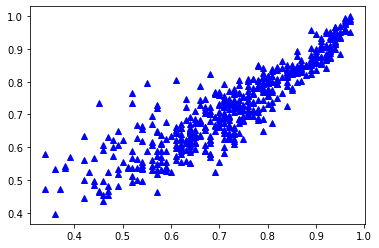

In [87]:
plt.plot(y,pred,'^',color='blue');

In [88]:
f_imp = lr.coef_
for i, v in enumerate(f_imp):
    print('Feature: %0d, Score:%.5f'%(i,v))

Feature: 0, Score:0.00000
Feature: 1, Score:0.00322
Feature: 2, Score:0.02140
Feature: 3, Score:0.13543
